In [77]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
%matplot inline

UsageError: Line magic function `%matplot` not found.


In [78]:
dfa = pd.read_csv('acceleration.csv', header = 1, parse_dates=['Time'])
dft = pd.read_csv('temperature.csv', header = 1, parse_dates=['Time'])
dfv = pd.read_csv('velocity.csv', header = 1, parse_dates=['Time'])
dfa.head()

,Time,Övre fläkt främre
0,2021-12-09 09:42:35,15 m/s²
1,2021-12-09 09:43:35,15.5 m/s²
2,2021-12-09 09:44:35,15.1 m/s²
3,2021-12-09 09:45:35,14.7 m/s²
4,2021-12-09 09:46:36,13 m/s²


In [79]:
dfa.columns = ['time', 'acceleration']
dft.columns = ['time', 'temperature']
dfv.columns = ['time', 'velocity']
dfv.head()

,time,velocity
0,2021-12-09 09:42:35,1.30 mm/s
1,2021-12-09 09:43:35,1.50 mm/s
2,2021-12-09 09:44:35,1.20 mm/s
3,2021-12-09 09:45:35,1.40 mm/s
4,2021-12-09 09:46:36,1.40 mm/s


In [80]:
dfa['acceleration'] = dfa['acceleration'].str.replace(' m/s²', '').astype(float)
dft['temperature'] = dft['temperature'].str.replace(' °C', '').astype(float)
dfv['velocity'] = dfv['velocity'].str.replace(' mm/s', '').astype(float)


In [81]:
df = pd.merge(dfa, dft, how='left', on='time')
df = pd.merge(df, dfv, how='left', on='time')

In [82]:
df

,time,acceleration,temperature,velocity
0,2021-12-09 09:42:35,15.0,28.0,1.3
1,2021-12-09 09:43:35,15.5,28.0,1.5
2,2021-12-09 09:44:35,15.1,28.0,1.2
3,2021-12-09 09:45:35,14.7,28.0,1.4
4,2021-12-09 09:46:36,13.0,28.0,1.4
...,...,...,...,...
262155,2022-06-09 09:37:31,14.0,30.5,1.7
262156,2022-06-09 09:38:31,13.8,30.5,1.5
262157,2022-06-09 09:39:31,14.6,30.5,1.7
262158,2022-06-09 09:40:32,13.7,30.5,1.8


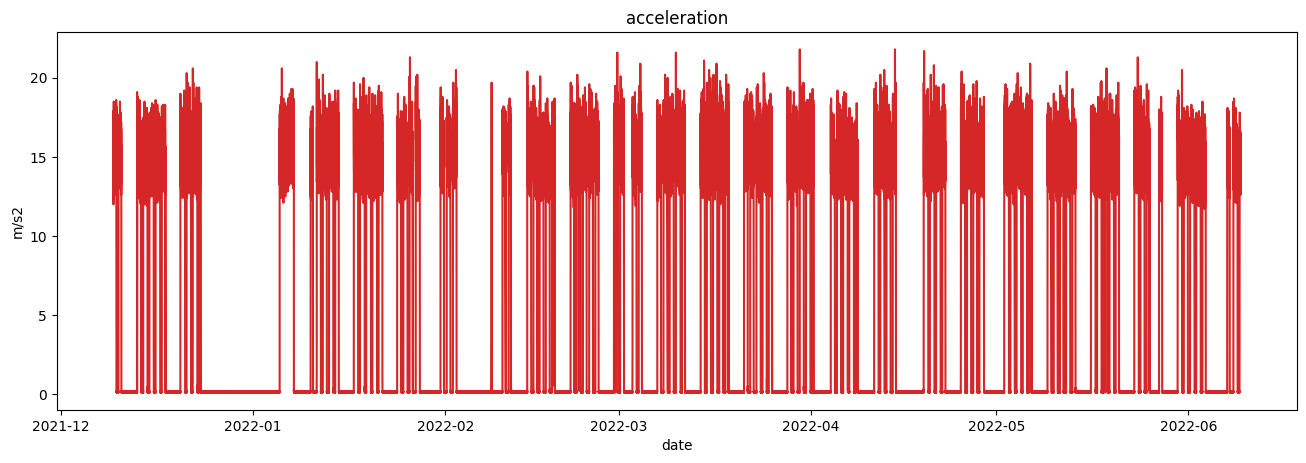

In [83]:
#Plot Timeseries Acceleration
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df['time'], df['acceleration'], color='tab:red')
plt.gca().set(title='acceleration', xlabel='date', ylabel='m/s2')
plt.show()





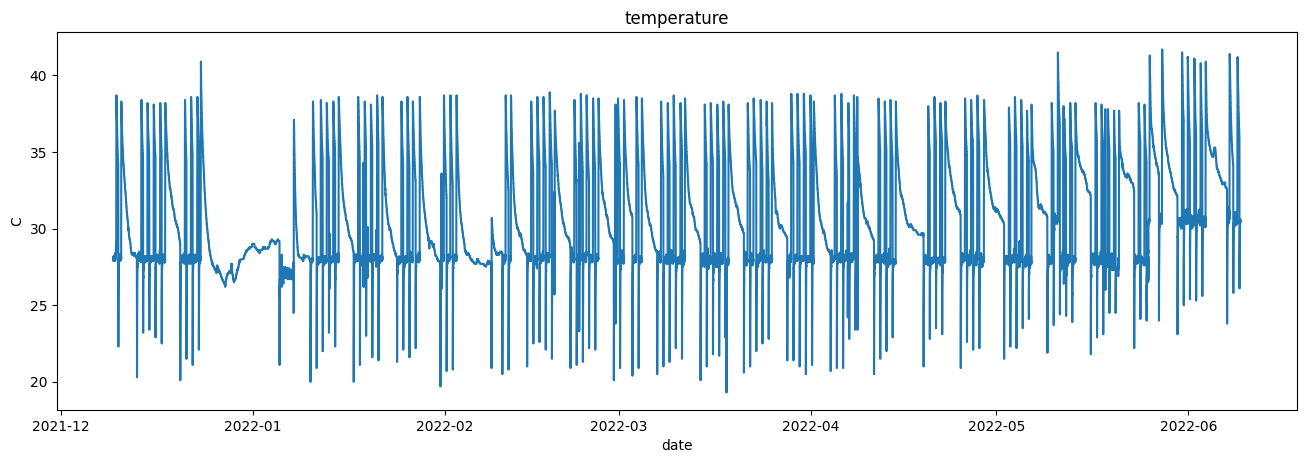

In [84]:
#Plot Timeseries Acceleration
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df['time'], df['temperature'], color='tab:blue')
plt.gca().set(title='temperature', xlabel='date', ylabel='C')
plt.show()

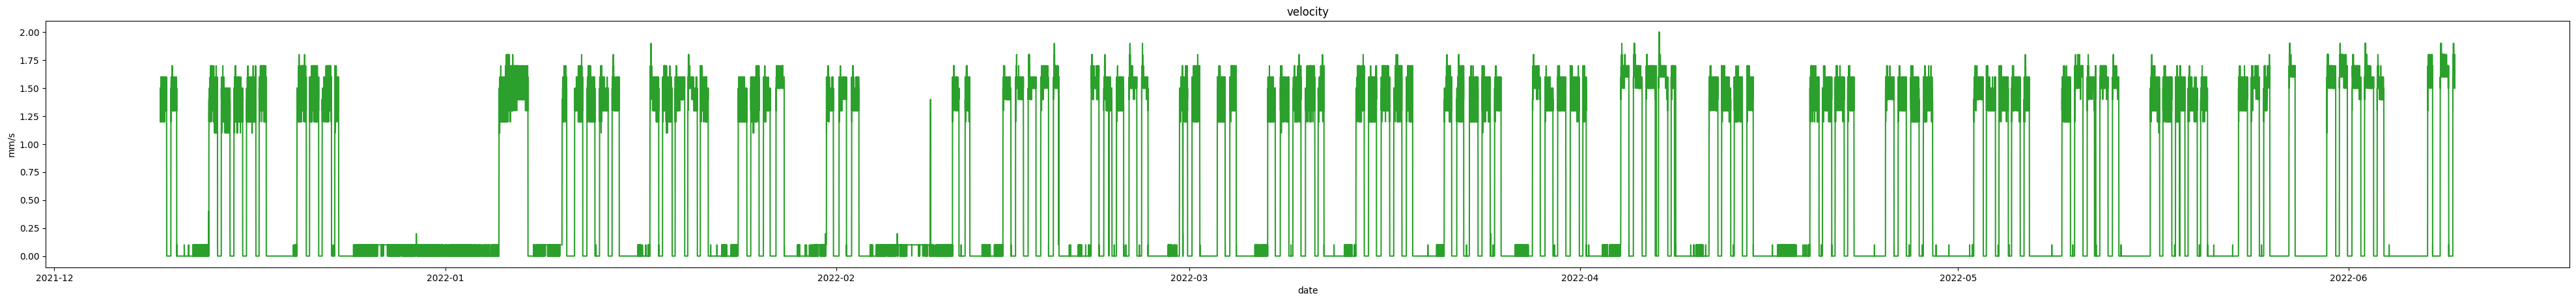

In [85]:
#Plot Timeseries Acceleration
plt.figure(figsize=(50,5), dpi=100)
plt.plot(df['time'], df['velocity'], color='tab:green')
plt.gca().set(title='velocity', xlabel='date', ylabel='mm/s')
plt.show()

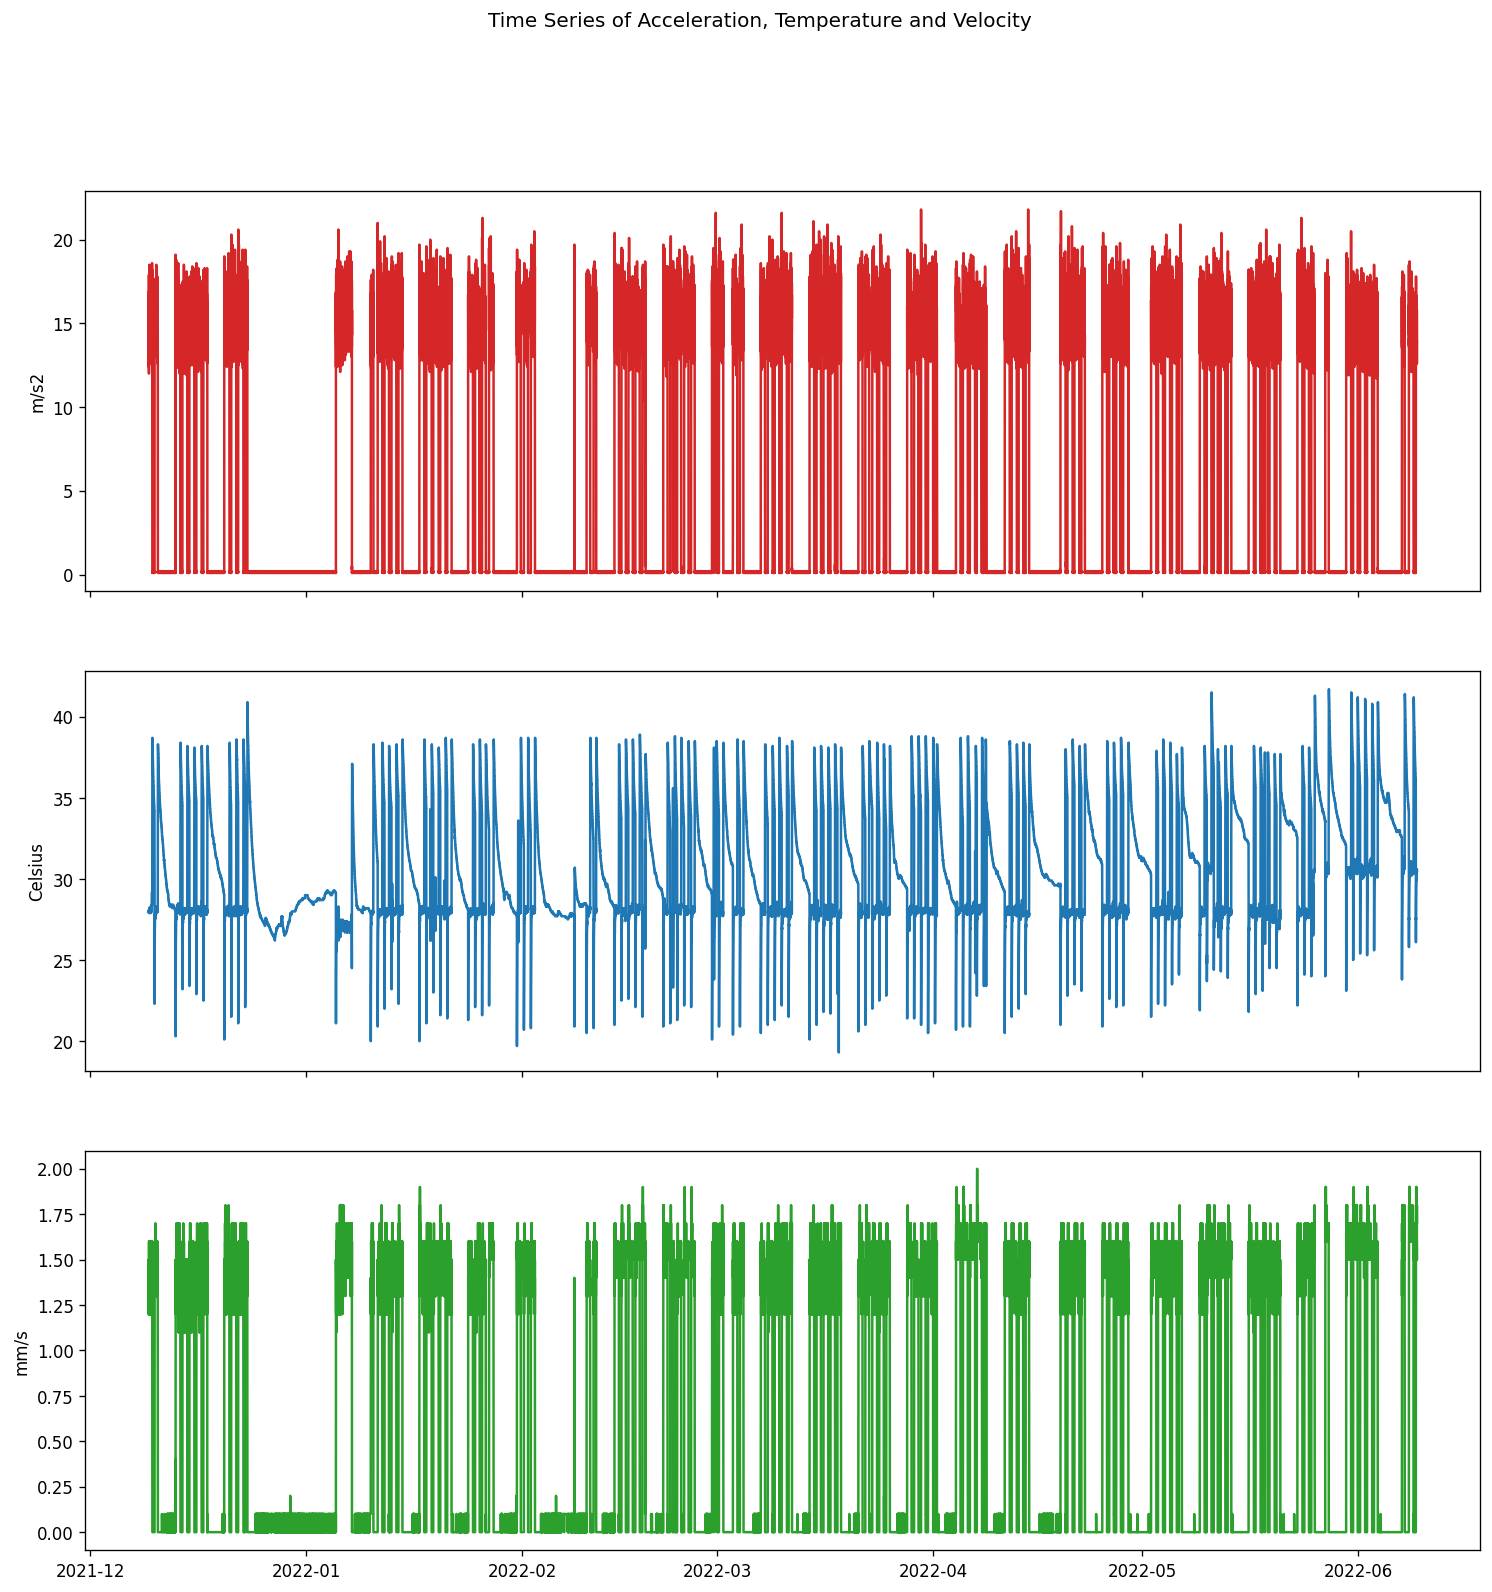

In [86]:
fig,(ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle('Time Series of Acceleration, Temperature and Velocity')
ax1.plot(df['time'], df['acceleration'], color='tab:red')
ax1.set(ylabel= 'm/s2')
ax2.set(ylabel= 'Celsius')
ax3.set(ylabel= 'mm/s')
ax2.plot(df['time'], df['temperature'], color='tab:blue')
ax3.plot(df['time'], df['velocity'], color='tab:green')
fig.set_figheight(15)
fig.set_figwidth(15)



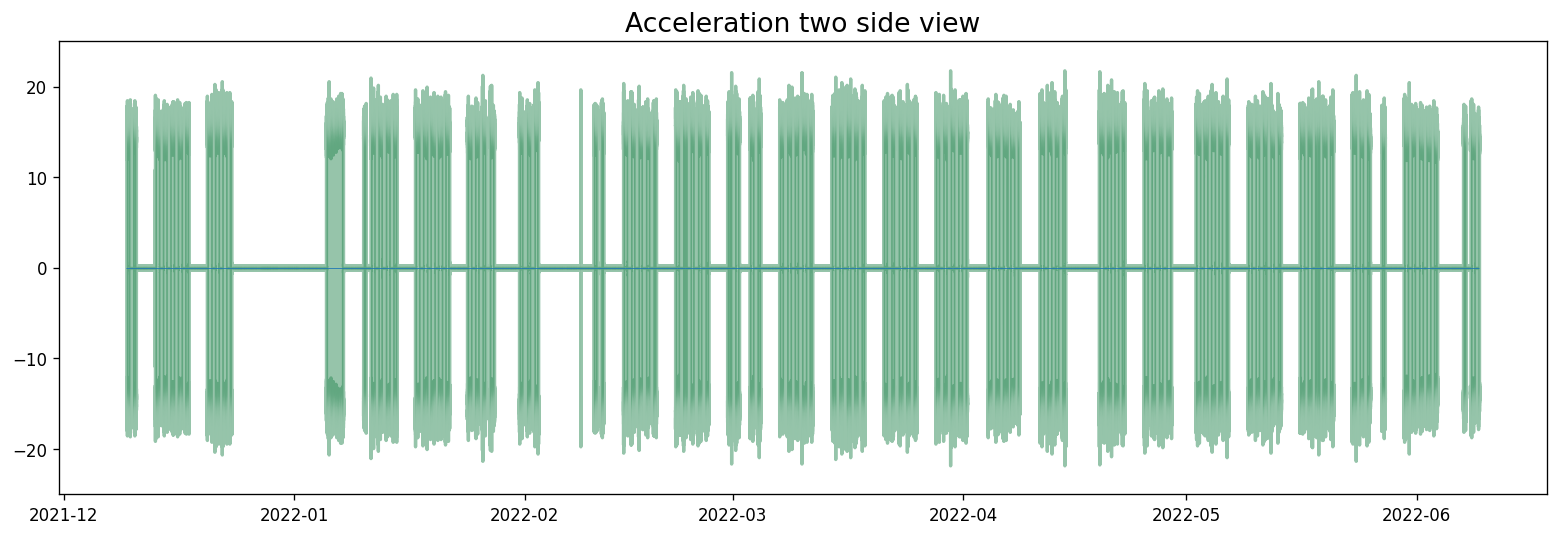

In [87]:
# Mirror axis
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(df['time'], y1=df['acceleration'], y2=-df['acceleration'], alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-25, 25)
plt.title('Acceleration two side view', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.time), xmax=np.max(df.time), linewidth=.5)
plt.show()

In [88]:
#groupby day
df_day = df.groupby([df['time'].dt.date]).mean()
df_day

,acceleration,temperature,velocity
time,,,
2021-12-09,12.249360,29.716880,1.192666
2021-12-10,6.948506,32.158443,0.652606
2021-12-11,0.152014,31.837014,0.000208
2021-12-12,0.149305,28.557302,0.075869
2021-12-13,10.128125,28.371597,0.990694
...,...,...,...
2022-06-05,0.157083,34.427569,0.000000
2022-06-06,0.158611,33.061736,0.000000
2022-06-07,5.840000,33.631250,0.648958


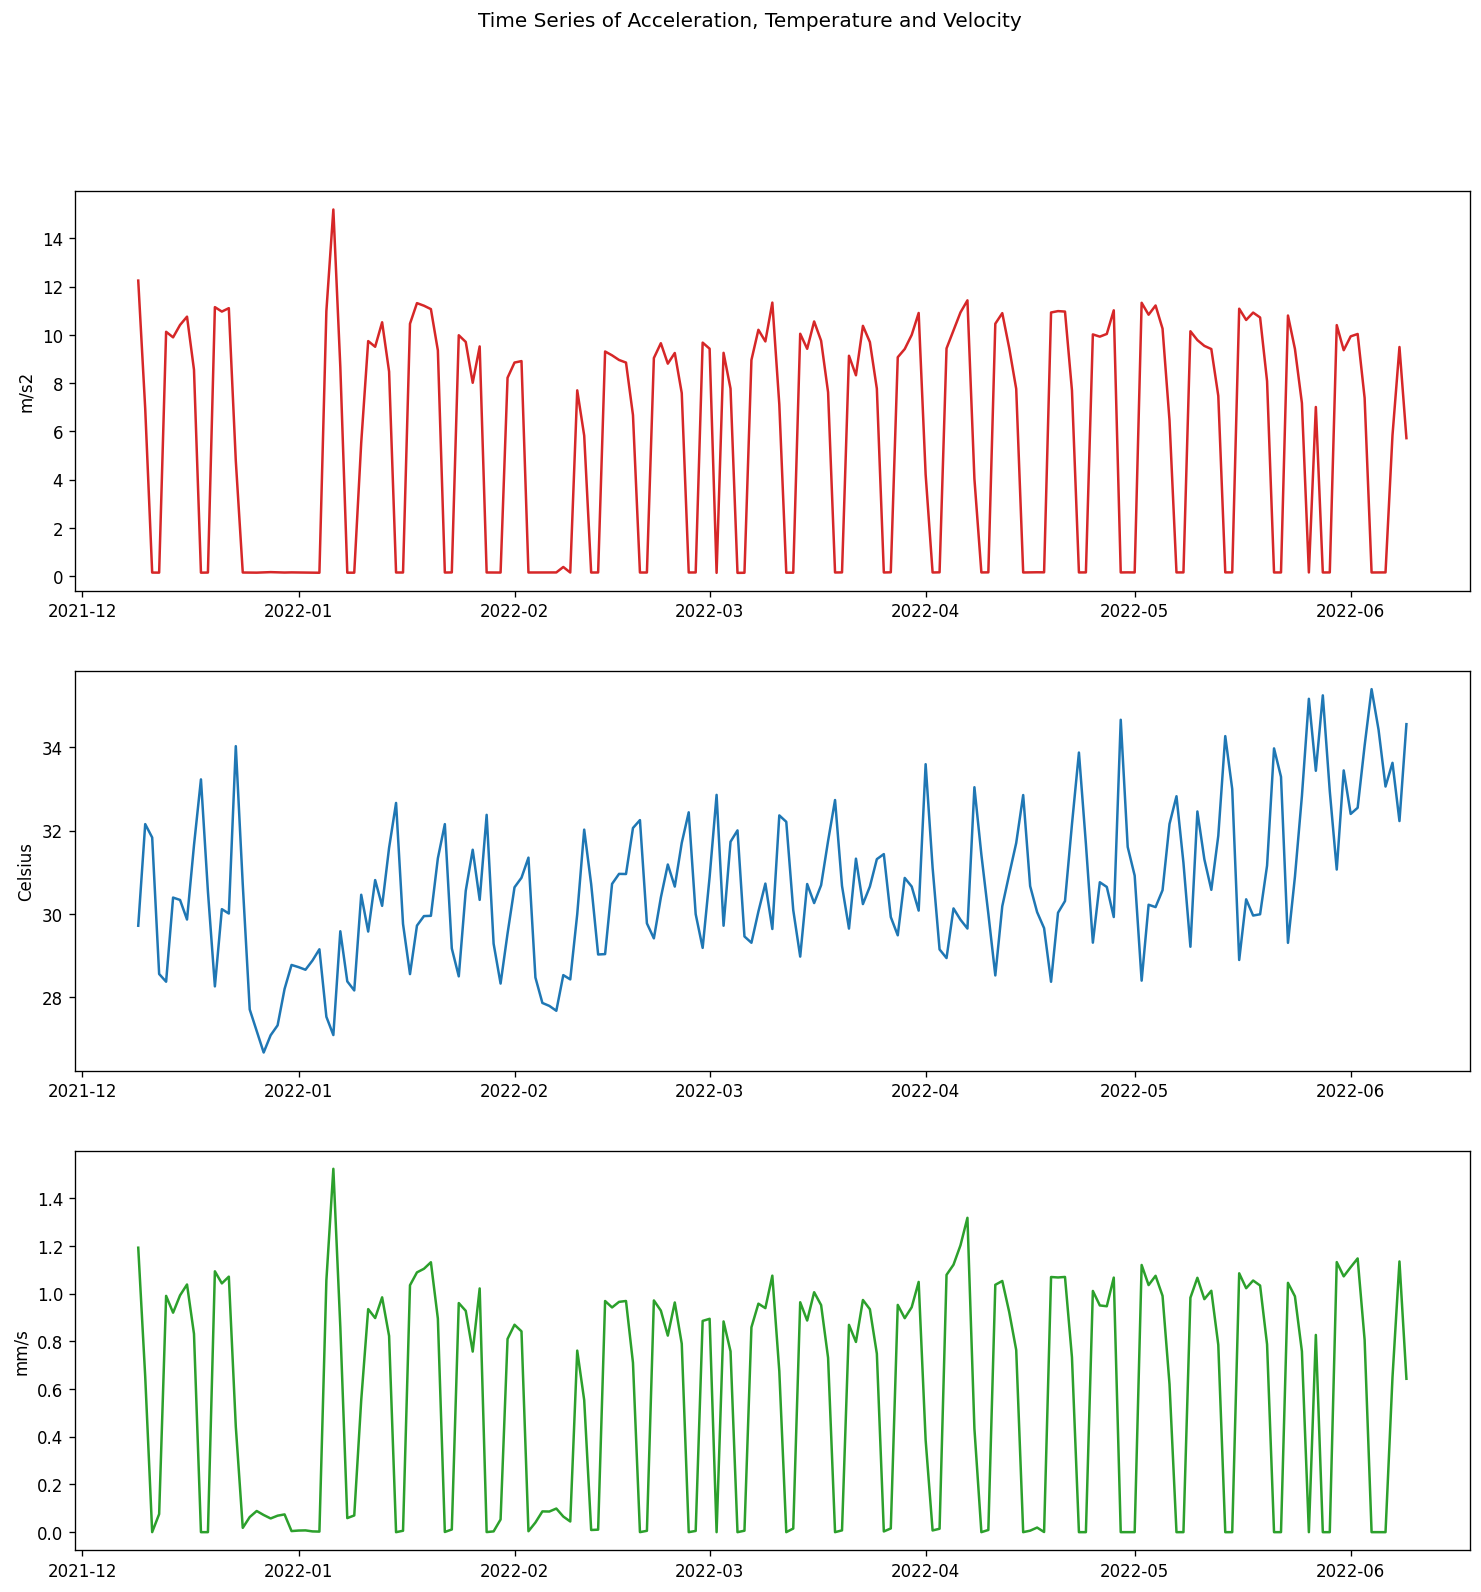

In [89]:
#Plot by day
fig,(ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Time Series of Acceleration, Temperature and Velocity')
ax1.plot(df_day.index, df_day['acceleration'], color='tab:red')
ax1.set(ylabel= 'm/s2')
ax2.set(ylabel= 'Celsius')
ax3.set(ylabel= 'mm/s')
ax2.plot(df_day.index, df_day['temperature'], color='tab:blue')
ax3.plot(df_day.index, df_day['velocity'], color='tab:green')
fig.set_figheight(15)
fig.set_figwidth(15)


In [90]:
df

,time,acceleration,temperature,velocity
0,2021-12-09 09:42:35,15.0,28.0,1.3
1,2021-12-09 09:43:35,15.5,28.0,1.5
2,2021-12-09 09:44:35,15.1,28.0,1.2
3,2021-12-09 09:45:35,14.7,28.0,1.4
4,2021-12-09 09:46:36,13.0,28.0,1.4
...,...,...,...,...
262155,2022-06-09 09:37:31,14.0,30.5,1.7
262156,2022-06-09 09:38:31,13.8,30.5,1.5
262157,2022-06-09 09:39:31,14.6,30.5,1.7
262158,2022-06-09 09:40:32,13.7,30.5,1.8


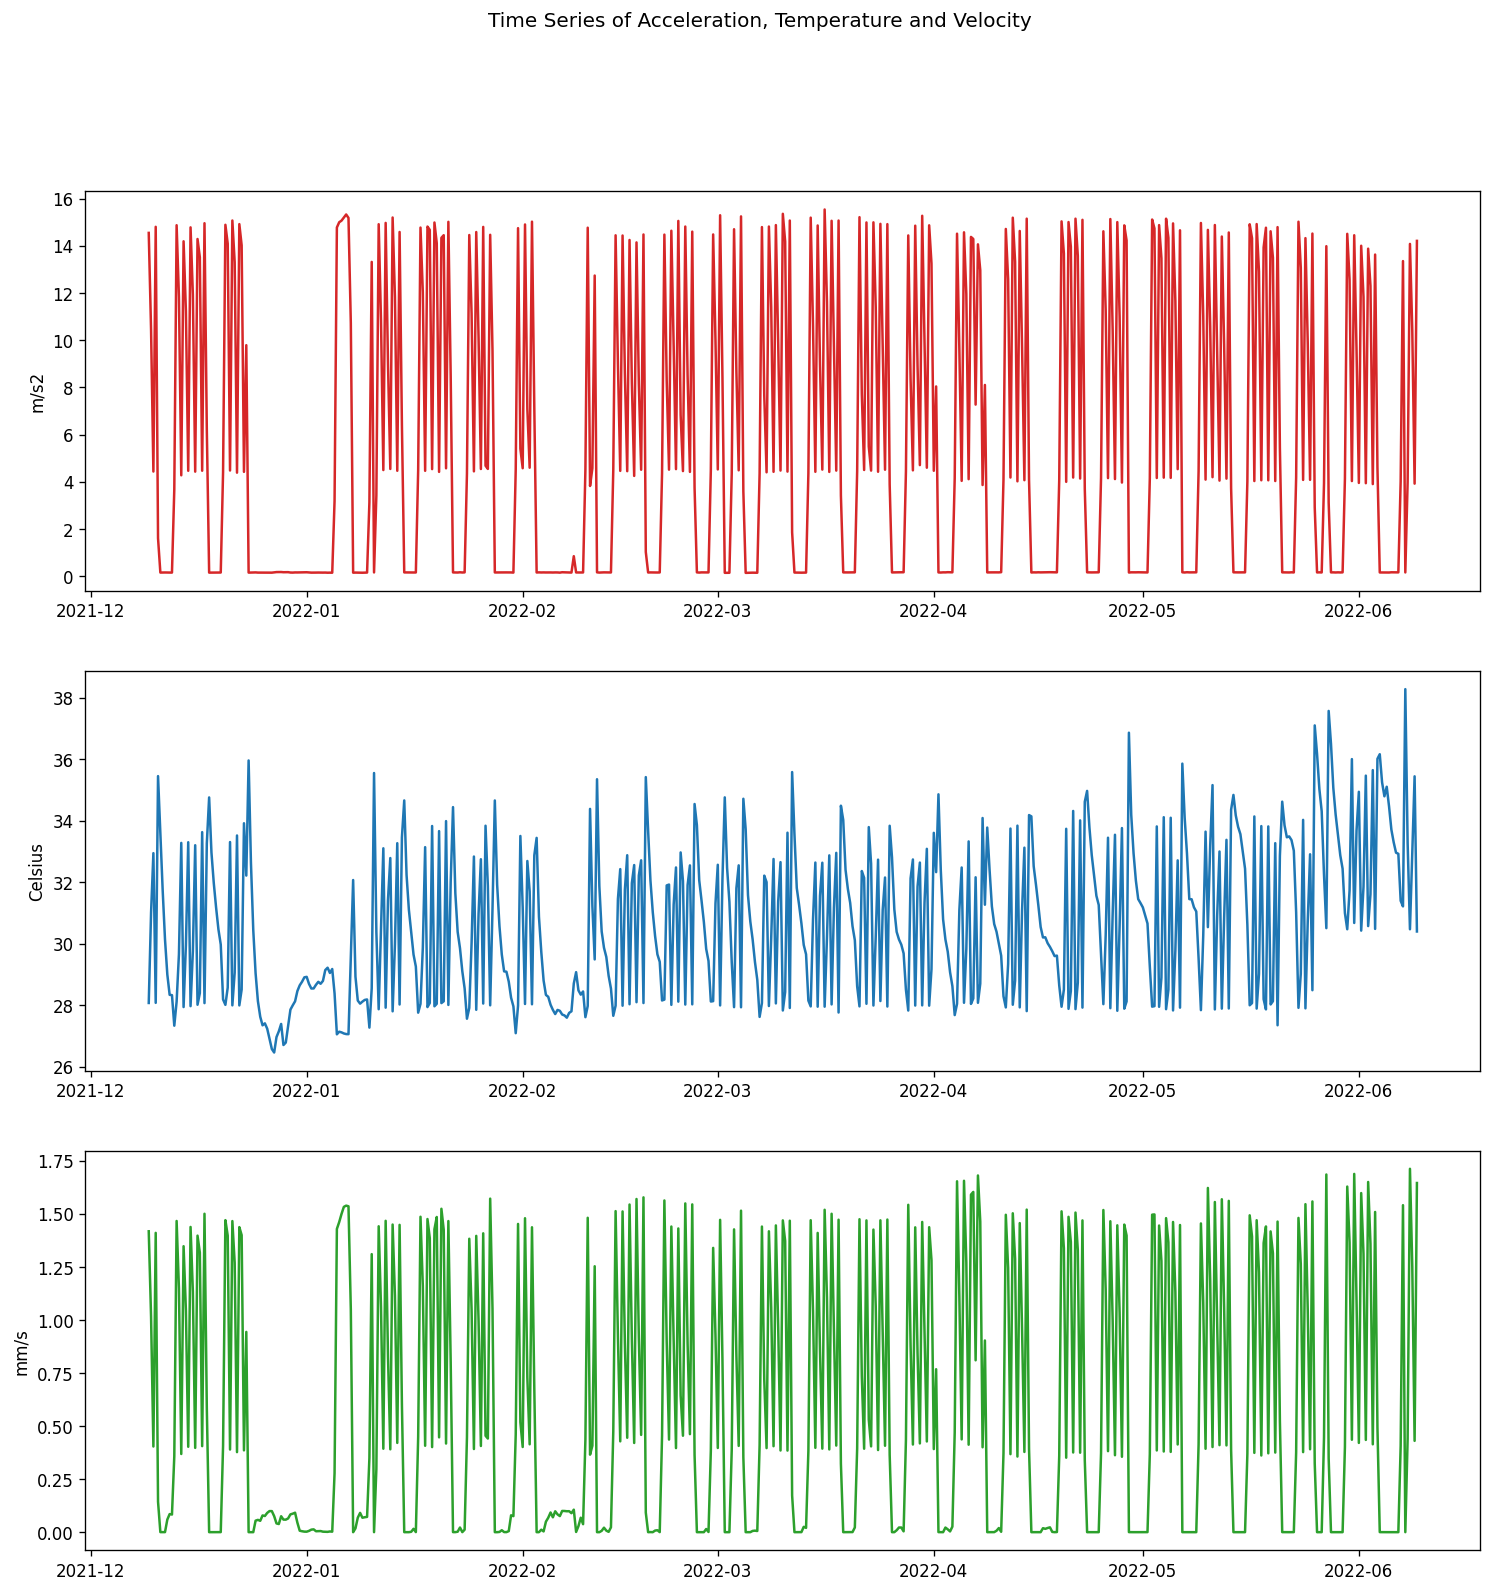

In [91]:
#Groupby halfday (or in this case 8 hours)
# index = pd.date_range(start = '2021-12-09', end = '2022-06-09', freq='8H')
df_halfday = df.resample('8H',on='time').mean()
df_halfday
fig,(ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Time Series of Acceleration, Temperature and Velocity')
ax1.plot(df_halfday.index, df_halfday['acceleration'], color='tab:red')
ax1.set(ylabel= 'm/s2')
ax2.set(ylabel= 'Celsius')
ax3.set(ylabel= 'mm/s')
ax2.plot(df_halfday.index, df_halfday['temperature'], color='tab:blue')
ax3.plot(df_halfday.index, df_halfday['velocity'], color='tab:green')
fig.set_figheight(15)
fig.set_figwidth(15)

In [92]:
# Create week column
df_day['day'] = [d.strftime('%a') for d in df_day.index]
df_day['month'] = [d.strftime('%b') for d in df_day.index]
df_day['week'] = [d.strftime('%U') for d in df_day.index]
df_day['hour'] = [d.strftime('%U') for d in df_day.index]
df_day

,acceleration,temperature,velocity,day,month,week,hour
time,,,,,,,
2021-12-09,12.249360,29.716880,1.192666,Thu,Dec,49,49
2021-12-10,6.948506,32.158443,0.652606,Fri,Dec,49,49
2021-12-11,0.152014,31.837014,0.000208,Sat,Dec,49,49
2021-12-12,0.149305,28.557302,0.075869,Sun,Dec,50,50
2021-12-13,10.128125,28.371597,0.990694,Mon,Dec,50,50
...,...,...,...,...,...,...,...
2022-06-05,0.157083,34.427569,0.000000,Sun,Jun,23,23
2022-06-06,0.158611,33.061736,0.000000,Mon,Jun,23,23
2022-06-07,5.840000,33.631250,0.648958,Tue,Jun,23,23


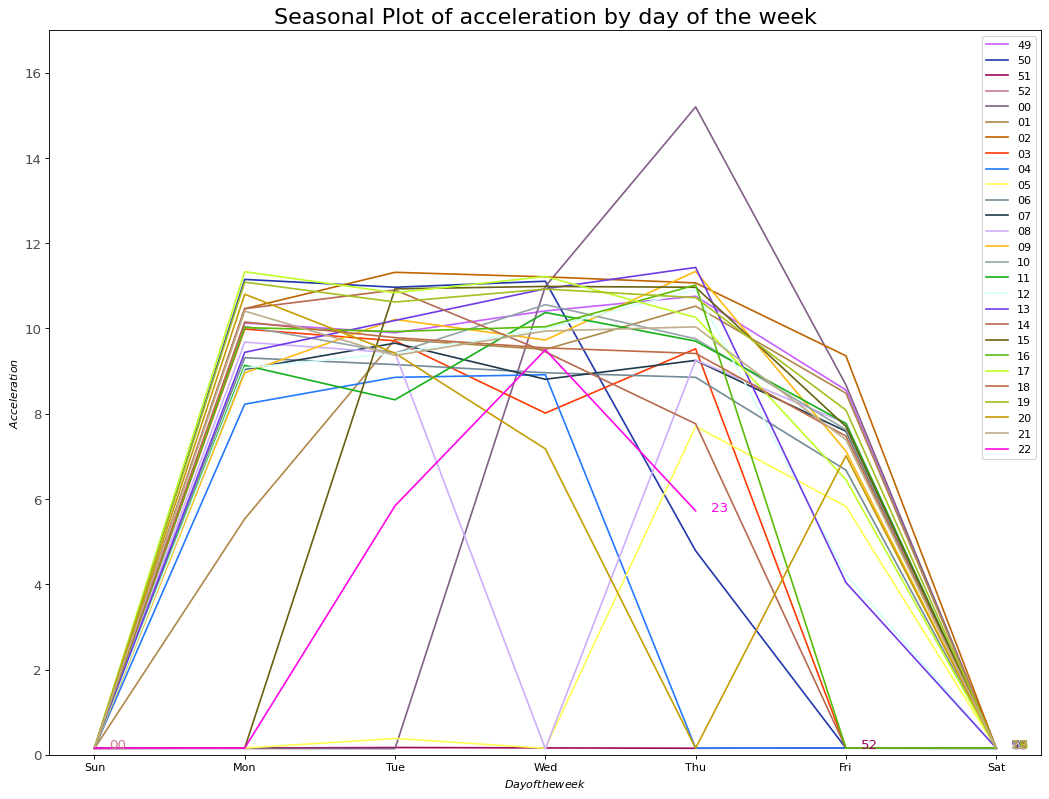

In [93]:
# Prepare data for seasonal plot on a weekly basis (acceleration)

weeks=df_day['week'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(weeks), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, m in enumerate(weeks):
    if i > 0:        
        plt.plot('day', 'acceleration', data=df_day.loc[df_day.week==m, :], color=mycolors[i], label=m)
        plt.text(df_day.loc[df_day.week==m, :].shape[0]-.9, df_day.loc[df_day.week==m, 'acceleration'][-1:].values[0], m, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set( ylim=(0, 17), ylabel='$Acceleration$', xlabel='$Day of the week$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of acceleration by day of the week", fontsize=20)
plt.legend(weeks)
plt.show()


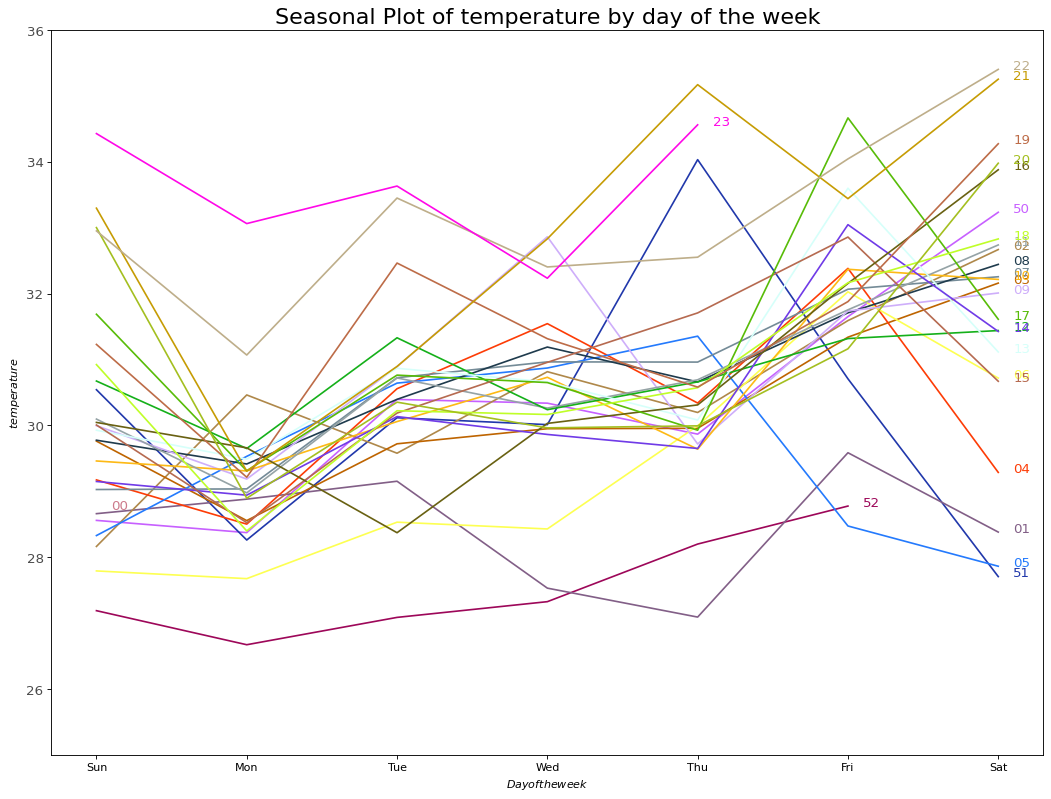

In [94]:
# Prepare data for seasonal plot on a weekly basis (temperature)

weeks=df_day['week'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(weeks), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, m in enumerate(weeks):
    if i > 0:        
        plt.plot('day', 'temperature', data=df_day.loc[df_day.week==m, :], color=mycolors[i], label=m)
        plt.text(df_day.loc[df_day.week==m, :].shape[0]-.9, df_day.loc[df_day.week==m, 'temperature'][-1:].values[0], m, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set( ylim=(25, 36), ylabel='$temperature$', xlabel='$Day of the week$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of temperature by day of the week", fontsize=20)
# plt.legend(weeks)
plt.show()


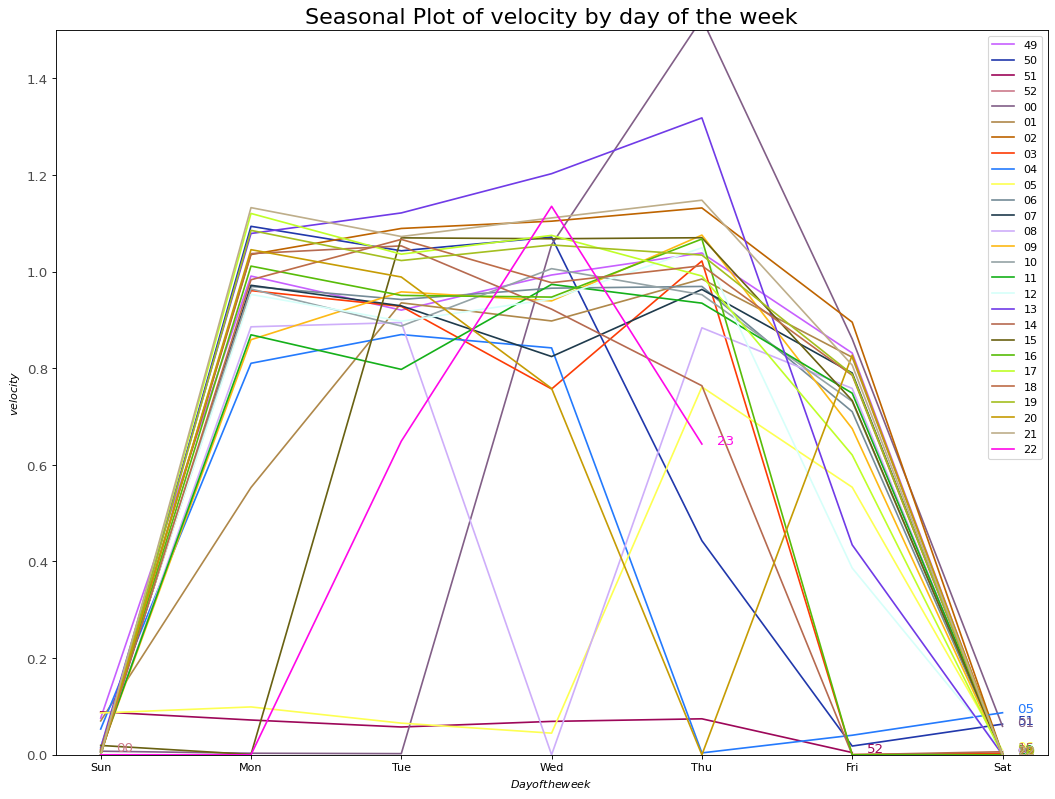

In [95]:
# Prepare data for seasonal plot on a weekly basis (velocity)

weeks=df_day['week'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(weeks), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, m in enumerate(weeks):
    if i > 0:        
        plt.plot('day', 'velocity', data=df_day.loc[df_day.week==m, :], color=mycolors[i], label=m)
        plt.text(df_day.loc[df_day.week==m, :].shape[0]-.9, df_day.loc[df_day.week==m, 'velocity'][-1:].values[0], m, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set( ylim=(0, 1.5), ylabel='$velocity$', xlabel='$Day of the week$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of velocity by day of the week", fontsize=20)
plt.legend(weeks)
plt.show()


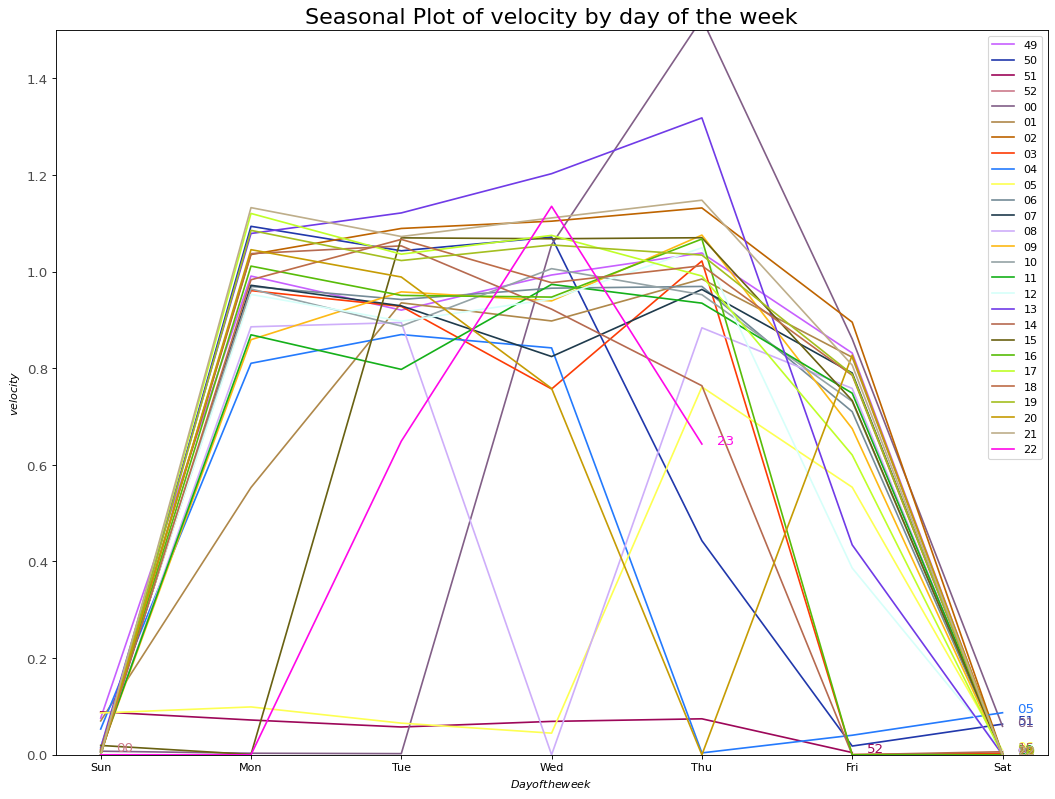

In [96]:
# Prepare data for seasonal plot on a weekly basis (velocity)

weeks=df_day['week'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(weeks), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, m in enumerate(weeks):
    if i > 0:        
        plt.plot('day', 'velocity', data=df_day.loc[df_day.week==m, :], color=mycolors[i], label=m)
        plt.text(df_day.loc[df_day.week==m, :].shape[0]-.9, df_day.loc[df_day.week==m, 'velocity'][-1:].values[0], m, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set( ylim=(0, 1.5), ylabel='$velocity$', xlabel='$Day of the week$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of velocity by day of the week", fontsize=20)
plt.legend(weeks)
plt.show()

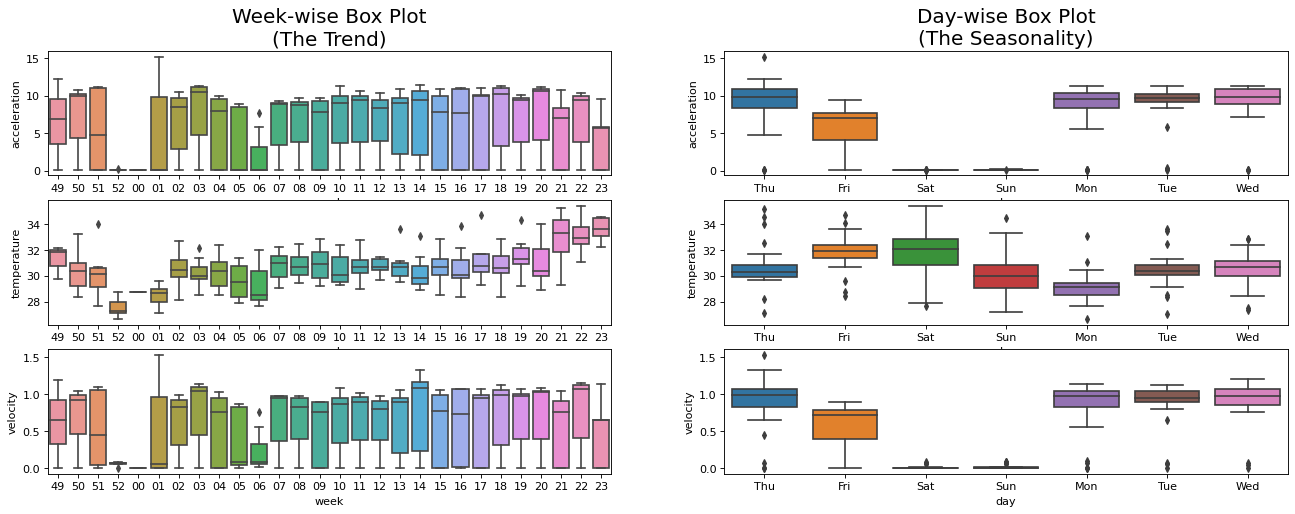

In [97]:
#Box plot of daily based on week of the year

# Draw Plot
fig, axes = plt.subplots(3, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='week', y='acceleration', data=df_day, ax=axes[0,0])
sns.boxplot(x='day', y='acceleration', data=df_day.loc[~df_day.week.isin([1, 52]), :], ax=axes[0,1])
sns.boxplot(x='week', y='temperature', data=df_day, ax=axes[1,0])
sns.boxplot(x='day', y='temperature', data=df_day.loc[~df_day.week.isin([1, 52]), :], ax=axes[1,1])
sns.boxplot(x='week', y='velocity', data=df_day, ax=axes[2,0])
sns.boxplot(x='day', y='velocity', data=df_day.loc[~df_day.week.isin([1, 52]), :], ax=axes[2,1])

# Set Title
axes[0,0].set_title('Week-wise Box Plot\n(The Trend)', fontsize=18); 
axes[0,1].set_title('Day-wise Box Plot\n(The Seasonality)', fontsize=18)

plt.show()

In [113]:
#lets do the same analysis but on a daily basis removing weekends and using the median to account for extremes

df_hour = df.resample('H',on='time').median()
df_hour['weekday'] = [d.strftime('%a') for d in df_hour.index]
df_hour['hour'] = [d.strftime('%H') for d in df_hour.index]
df_hour['yearweek'] = [d.strftime('%W') for d in df_hour.index]
df_hour['month'] = [d.strftime('%b') for d in df_hour.index]
df_hour['yearday'] = [d.strftime('%j') for d in df_hour.index]
df_hour['year'] = [d.strftime('%Y') for d in df_hour.index]
df_hour['hour']=df_hour['hour'].astype(int)

df_hour = df_hour[~df_hour['weekday'].isin(['Sun', 'Sat'])]
df_hour = df_hour[~df_hour['hour'].isin([22,23,24,0,1,2,3,4,5])]
df_hour.head()


,acceleration,temperature,velocity,weekday,hour,yearweek,month,yearday,year
time,,,,,,,,,
2021-12-09 09:00:00,14.75,28.0,1.4,Thu,9,49,Dec,343,2021
2021-12-09 10:00:00,14.20,28.0,1.4,Thu,10,49,Dec,343,2021
2021-12-09 11:00:00,14.45,28.1,1.4,Thu,11,49,Dec,343,2021
2021-12-09 12:00:00,14.25,28.0,1.4,Thu,12,49,Dec,343,2021
2021-12-09 13:00:00,14.45,28.1,1.4,Thu,13,49,Dec,343,2021


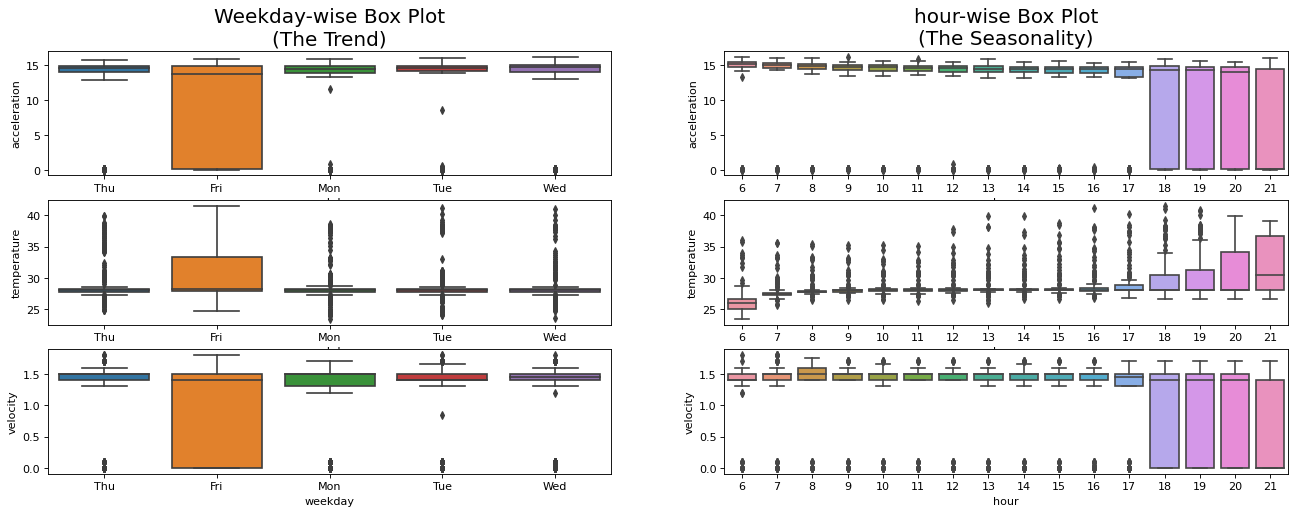

In [99]:
#Box plot of hourly based on day of the weekday

# Draw Plot
fig, axes = plt.subplots(3, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='weekday', y='acceleration', data=df_hour, ax=axes[0,0])
sns.boxplot(x='hour', y='acceleration', data=df_hour.loc[~df_hour.weekday.isin([1, 52]), :], ax=axes[0,1])
sns.boxplot(x='weekday', y='temperature', data=df_hour, ax=axes[1,0])
sns.boxplot(x='hour', y='temperature', data=df_hour.loc[~df_hour.weekday.isin([1, 52]), :], ax=axes[1,1])
sns.boxplot(x='weekday', y='velocity', data=df_hour, ax=axes[2,0])
sns.boxplot(x='hour', y='velocity', data=df_hour.loc[~df_hour.weekday.isin([1, 52]), :], ax=axes[2,1])

# Set Title
axes[0,0].set_title('Weekday-wise Box Plot\n(The Trend)', fontsize=18); 
axes[0,1].set_title('hour-wise Box Plot\n(The Seasonality)', fontsize=18)

plt.show()

In [100]:
# Lets try to plot some weeks on a hourly bases the histogram curves
df_hour_january = df_hour.loc[df_hour['yearweek'].isin(['03']), :]
df_hour_january

,acceleration,temperature,velocity,weekday,hour,yearweek,month,yearday
time,,,,,,,,
2022-01-17 06:00:00,15.60,24.50,1.60,Mon,6,03,Jan,017
2022-01-17 07:00:00,15.10,27.35,1.60,Mon,7,03,Jan,017
2022-01-17 08:00:00,14.40,27.80,1.60,Mon,8,03,Jan,017
2022-01-17 09:00:00,14.50,28.00,1.50,Mon,9,03,Jan,017
2022-01-17 10:00:00,14.50,28.10,1.50,Mon,10,03,Jan,017
...,...,...,...,...,...,...,...,...
2022-01-21 17:00:00,14.70,28.00,1.40,Fri,17,03,Jan,021
2022-01-21 18:00:00,14.70,28.10,1.40,Fri,18,03,Jan,021
2022-01-21 19:00:00,14.20,28.10,1.40,Fri,19,03,Jan,021


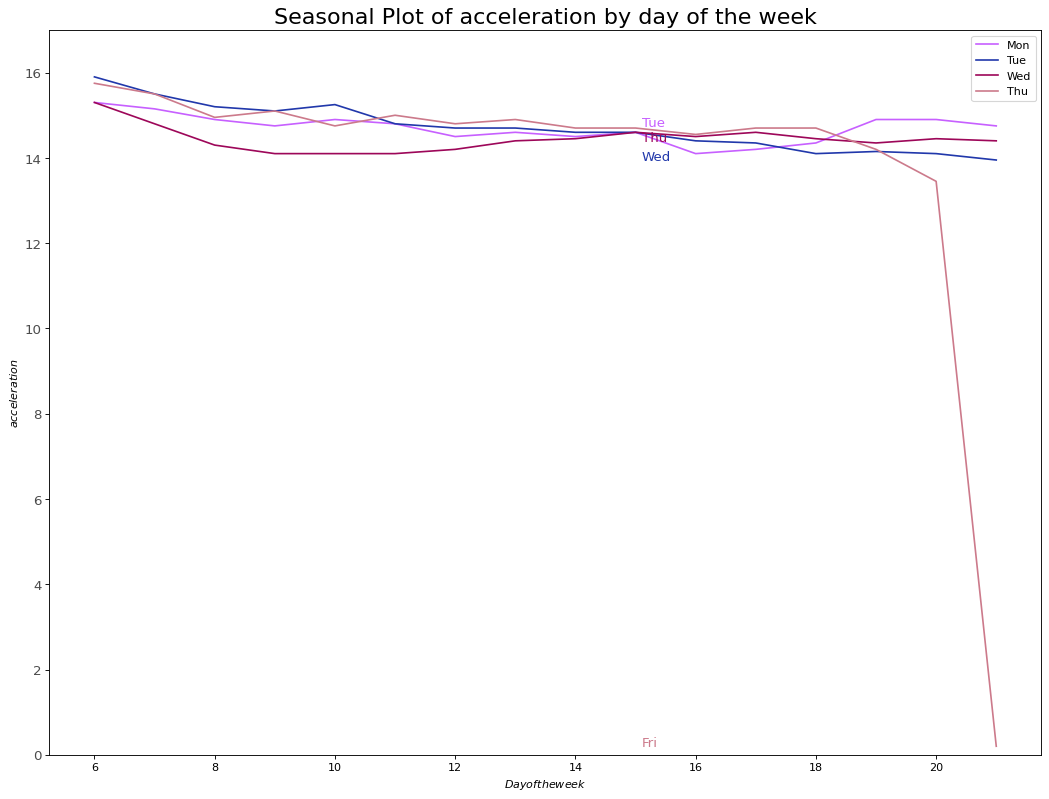

In [101]:
# Prepare data for seasonal plot on a weekly basis (acceleration)

weeks=df_hour_january['weekday'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(weeks), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, m in enumerate(weeks):
    if i > 0:        
        plt.plot('hour', 'acceleration', data=df_hour_january.loc[df_hour_january.weekday==m, :], color=mycolors[i], label=m)
        plt.text(df_hour_january.loc[df_hour_january.weekday==m, :].shape[0]-.9, df_hour_january.loc[df_hour_january.weekday==m, 'acceleration'][-1:].values[0], m, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set( ylim=(0, 17), ylabel='$acceleration$', xlabel='$Day of the week$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of acceleration by day of the week", fontsize=20)
plt.legend(weeks)
plt.show()

In [137]:
df_hour_without_filter = df.resample('H',on='time').median()
df_hour_without_filter['acceleration']

time
2021-12-09 09:00:00    14.75
2021-12-09 10:00:00    14.20
2021-12-09 11:00:00    14.45
2021-12-09 12:00:00    14.25
2021-12-09 13:00:00    14.45
                       ...  
2022-06-09 05:00:00     0.20
2022-06-09 06:00:00    14.65
2022-06-09 07:00:00    14.40
2022-06-09 08:00:00    14.20
2022-06-09 09:00:00    14.10
Freq: H, Name: acceleration, Length: 4369, dtype: float64

In [141]:
#Lets do some seasonality calculation adn division, we can start with additive time series
# Value = Base Level + Trend + Seasonality + Error

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_hour_without_filter['acceleration'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_hour_without_filter['acceleration'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

ValueError: This function does not handle missing values